# Telecom Customer Churn Prediction
_Project done by Amay Jaiswal_  
_Role: Data Analyst / Data Scientist_

## What is Customer Churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels.As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

## Objectives:
1. Finding the % of Churn Customers and customers that keep in with the active services.
2. Analysing the data in terms of various features responsible for customer Churn
3. Finding a most suited machine learning model for correct classification of Churn and non churn customers.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

## Dataset:
##### Telco Customer Churn

The data set includes information about:
1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

## Load Data
The data set in this article uses (.csv format) so we use pandas.read_csv to load the data set.

In [9]:
# Import dataset and make a CustomerID column to index
df = pd.read_csv(r"C:\Users\Dongen_Master\Desktop\Telecom Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv",
                        index_col = 'customerID')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.shape

(7043, 20)

The data set contains 7043 rows and 20 columns. Next, we will check for unique values from each column in the data.

In [18]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

# Data Understanding
## Classification Label

1. Churn — Whether the customer churned or not (Yes or No)

## Services Each Customer Has to Sign Up

1. PhoneService — Whether the customer has a phone service or not (Yes or No)
2. MultipleLines — Whether the customer has multiple lines or not (Yes, No, No phone service)
3. InternetService — A type of internet service the customer has (DSL, Fiber Optic, No)
4. OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet Service)
5. OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet Service)
6. DeviceProtection — Whether the customer has device protection or not (Yes, No, No Internet Service)
7. TechSupport — Whether the customer has tech support or not (Yes, No, No Internet Service)
8. StreamingTV—Whether the customer has a streaming TV (Yes, No, No Internet Service)
9. StreamingMovies — Whether the customer has a streaming movie (Yes, No, No Internet Service)

## Customer Account Information

1. Tenure — How long customer has stayed in the company
2. Contract — The type of contract the customer has (Month-to-Month, One year, Two years)
3. PaperlessBilling — Whether the customer has a paperless billing (Yes, No)
4. PaymentMethod — payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
5. MonthlyCharges — Amount charged to the customer monthly
6. TotalCharges — The total amount charged to the customer

## Customer Demographic Info

1. CustomerID — Unique value for each customer
2. gender — The type of gender each customer (Female, Male)
3. SeniorCitizen — Whether the customer is a senior citizen (Yes, No)
4. Partner — Whether the customer has a partner or not (Yes, No)
5. Dependents — Whether the customer has a dependent or not (Yes, No)

# Exploratory Data Analysis (EDA)

## Data Overview
In this section, we will learn about statistic description and info about data type

In [19]:
# Statistic descriptive
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### We can take a conclusion from that is :

1. SeniorCitizen must be categorical data because has minimum value is 0 and the maximum value is 1.
2. The average customer stayed in the company is 32 months and 75% of customer has a tenure of 55 month
3. Average monthly charges are USD 64.76 and 25% of customers pay more than USD 89.85

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

#### There is something wrong with the data set on the TotalCharges column it must be float not object so we will change it to float.

In [21]:
# Change TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

### Payment Method Check

In [22]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

#### In the payment method, there is the word automatic and we will delete it because if we visualize a tick label is so long.

In [23]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

### Missing Values

In [24]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

TotalCharges, 0.0016 % Missing values


#### The data set has missing values in TotalCharges is 0.0016% which is so a small percentage

In [25]:
# Check observation of missing values
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


#### As shown above, we see all of the tenures are zero so we will drop the missing values

In [26]:
# Drop missing values
df.dropna(inplace=True)

## Target Variable Visualization

In [27]:
#Apply the ggplot style
plt.style.use("ggplot")

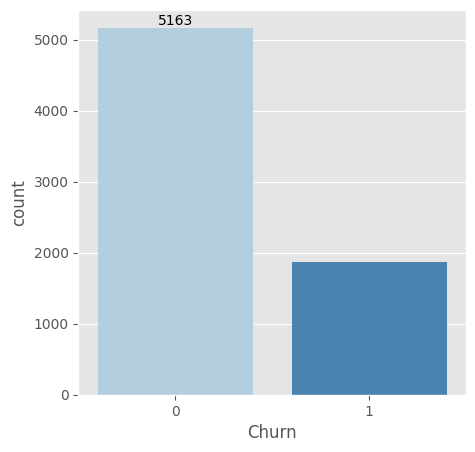

In [59]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

The following bar plot shows the target variable of churn yes and no. The proportion of churn is an imbalanced data set because both classes are not equally distributed. To handle it, resampling would be a suitable approach. To keep this simple, we will keep the imbalanced data set and uses many evaluation matrices to evaluate models.

# Analysis Services Each Customer

In [2]:
#Make a function to plot categorical data according to target
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

We will evaluate a percentage target for each customer services column (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)

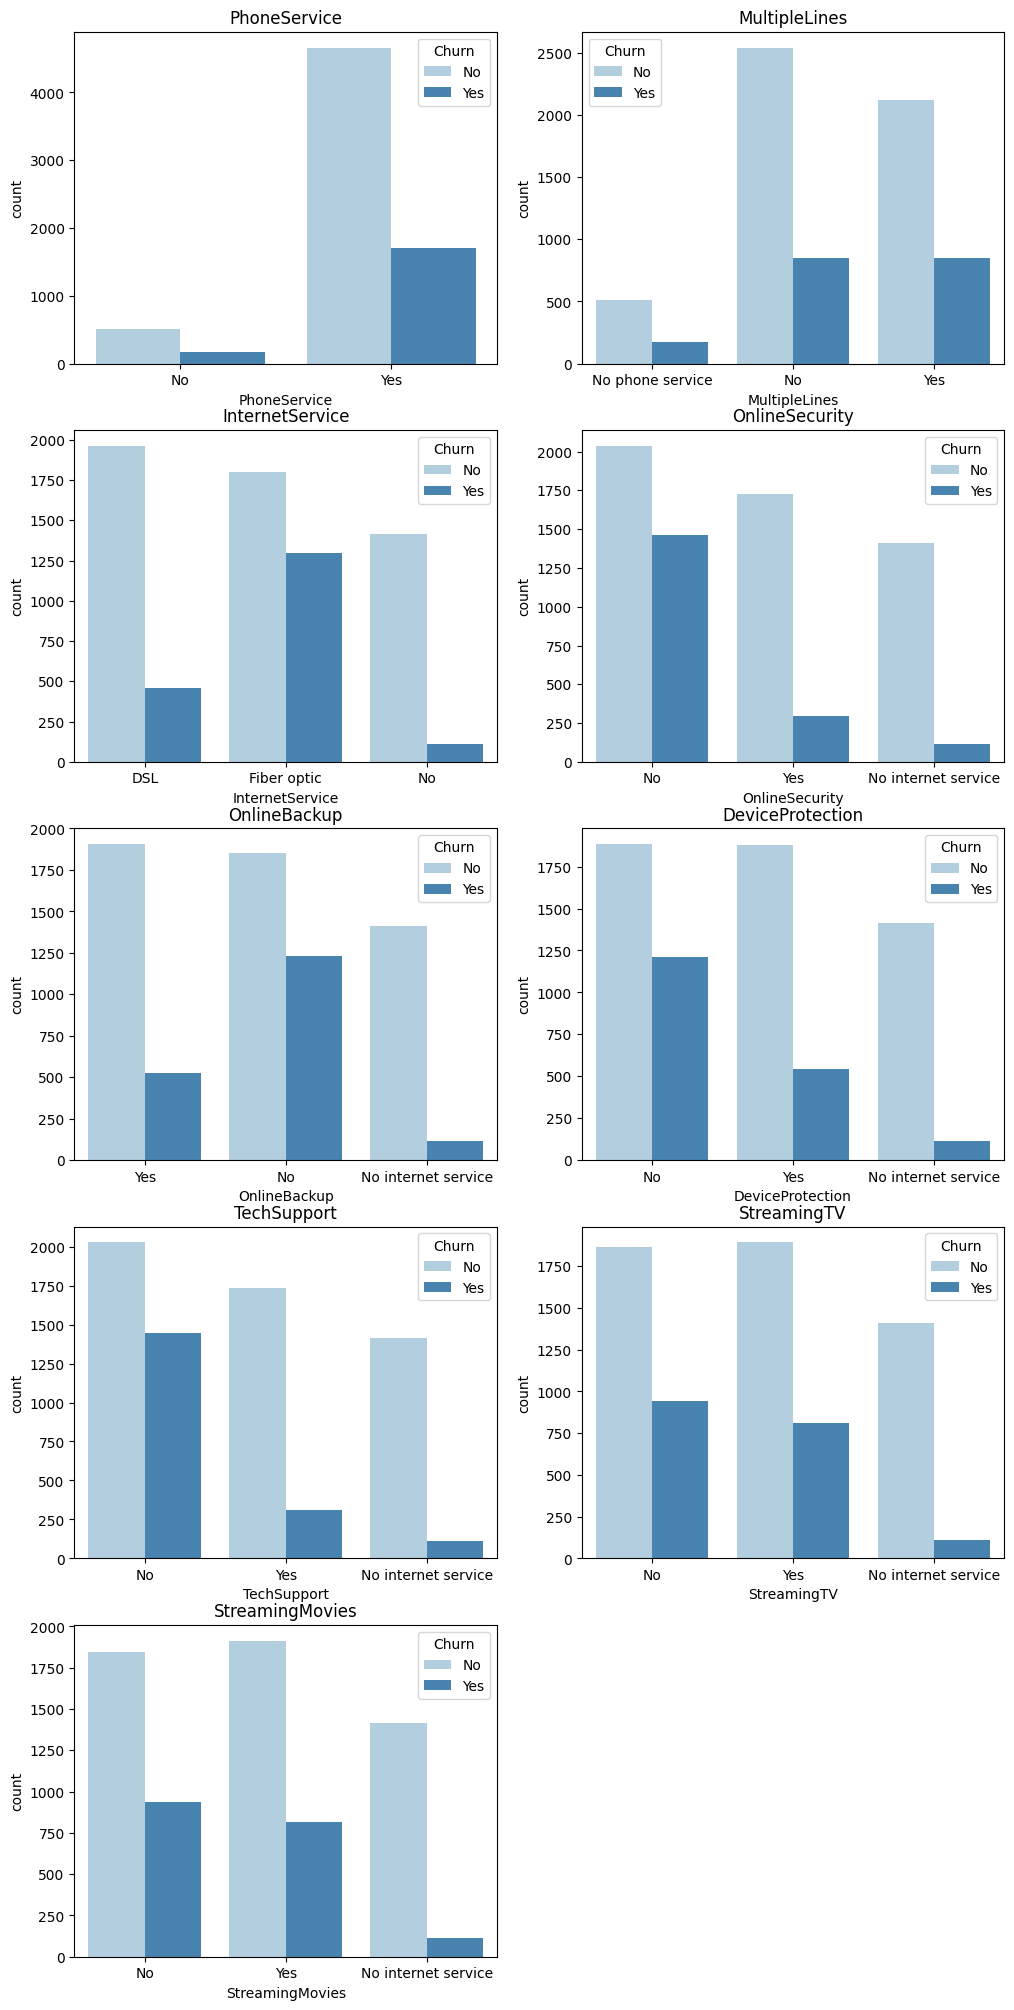

In [10]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

#### We can extract the following conclusions by evaluating service attributes

1. The moderately higher churn rate for customers who has the phone service.
2. Customers with internet service fiber optic have a higher churn rate compared with DSL and No.
3. The much higher churn rate for customers without online security.
4. Customers who don’t have access to tech support tend to leave more frequently than those who do.
5. Customers without online backup and device protection have a higher churn rate.

## Analysis Customer Account Information — Categorical Variables
We will evaluate the percentage of churn for each customer account information (Contract, PaperlessBilling, PaymentMethod)

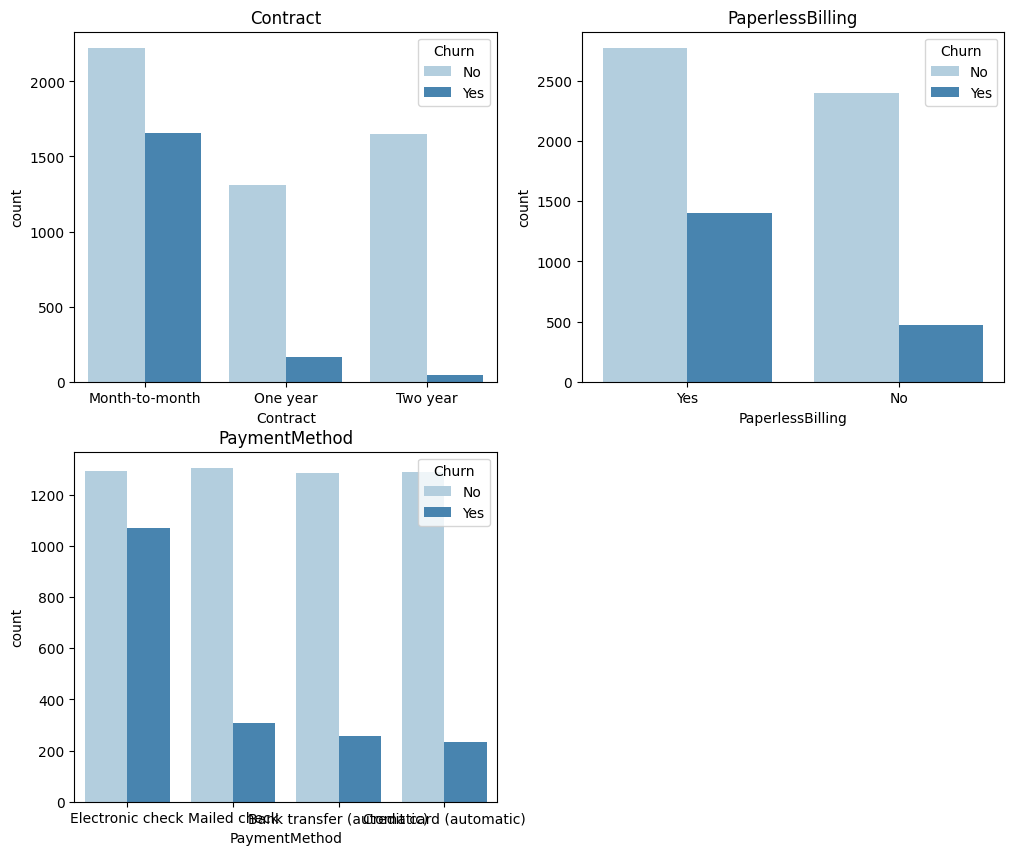

In [11]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

#### The following bar plot shown above can make conclusions from that:

1. Customers are more likely to churn with month-to-month contracts.
2. Moderately higher churn rate with electronic check payment method.
3. Customers with paperless billing have higher churn rates.

## Analysis Customer Account Information — Numerical Variables
We will evaluate the distribution for each numerical variable from customer account information (tenure, MonthlyCharges, TotalCharges).

In [12]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

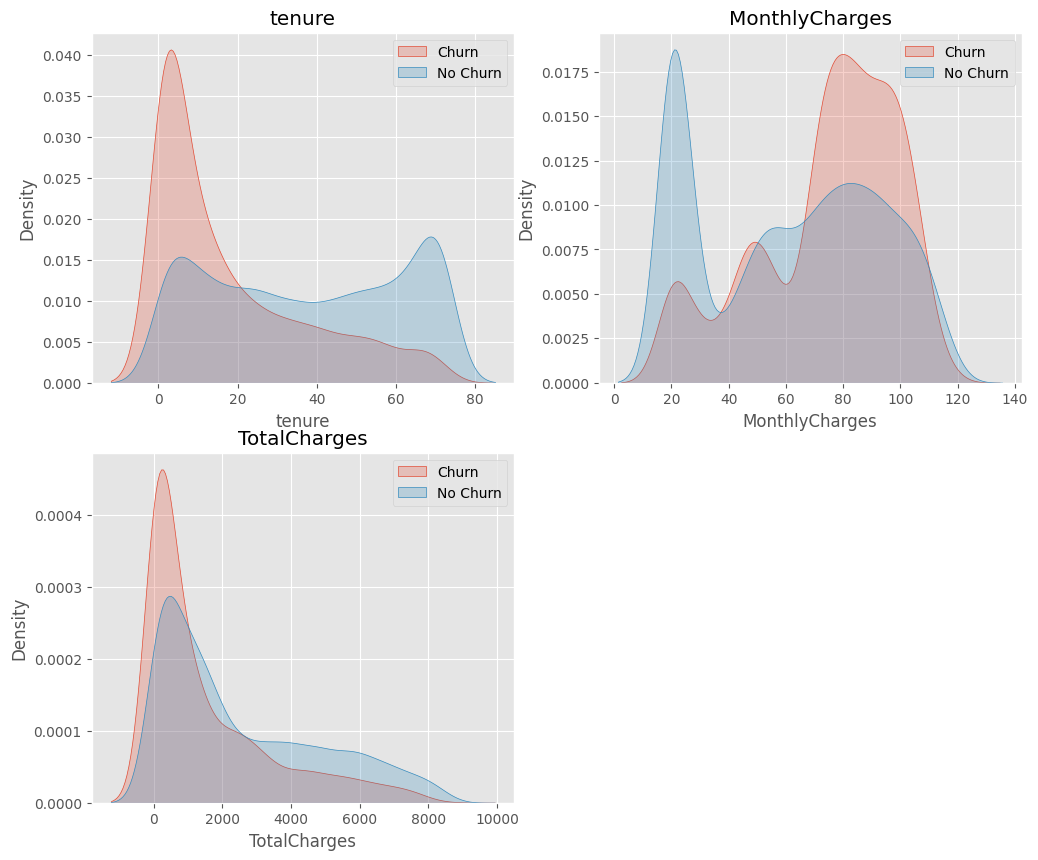

In [33]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

### The following histograms above we can get conclusions that:

1. Customers with short tenure are more churn.
2. Customers with paid more on monthly charges have higher churn rates.
3. Customers with high total charges tend to churn.

## Analysis of Customer's Demographic Info
We will evaluate the percentage of churn rate from the customer is demographic info (gender, SeniorCitizen, Partner, Dependents)

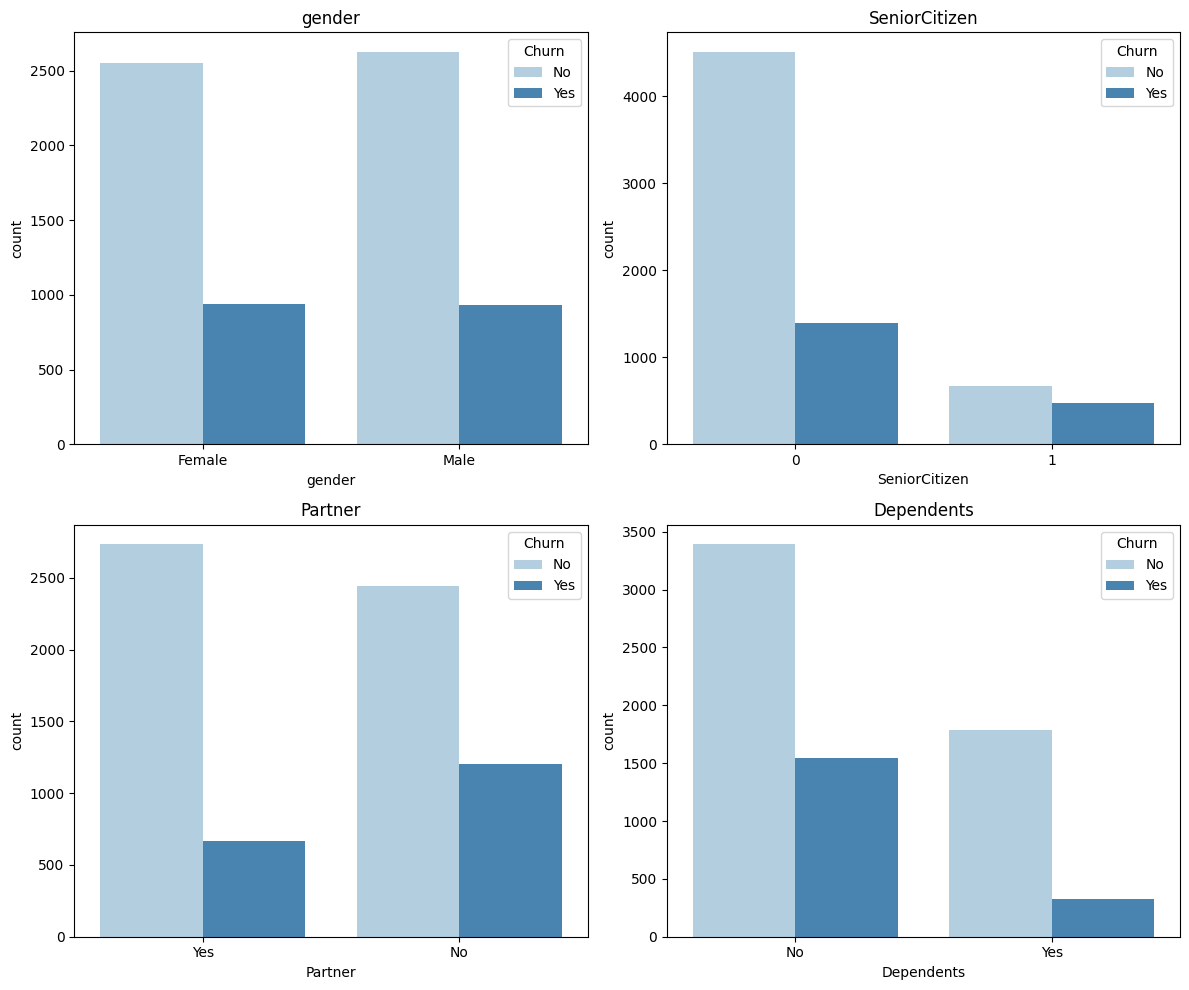

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define a function to plot categorical variables with respect to the target column 'Churn'
def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / 2)

    fig, axs = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))
    axs = axs.flatten()

    for index, column in enumerate(categorical_values):
        sns.countplot(x=column, data=df, hue=target, palette="Blues", ax=axs[index])
        axs[index].set_title(column)

    # Remove any extra subplots
    if len(categorical_values) % 2 != 0:
        fig.delaxes(axs[-1])

    plt.tight_layout()
    plt.show()

# Columns to plot (example based on your image: Gender, SeniorCitizen, Partner, Dependents)
categorical_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]

# Call the function
plot_categorical_to_target(df, categorical_columns, 'Churn')

### The following bar plot above we can draw some conclusions:

1. Churn and no churn no have differences for each gender.
2. Young customers are more likely to churn rather than old customers.
3. Customers with a partner are less than churn if compared with a partner.

### Outlier Checking with Boxplot for Numerical Variables
Outlier is an observation data set with significantly differs from others' observations of the data set. Outliers can make machine learning models with low accuracy so it is important to check them. We will check outliers from each numerical variable such as tenure, MonthlyCharges, and TotalCharges.

In [34]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

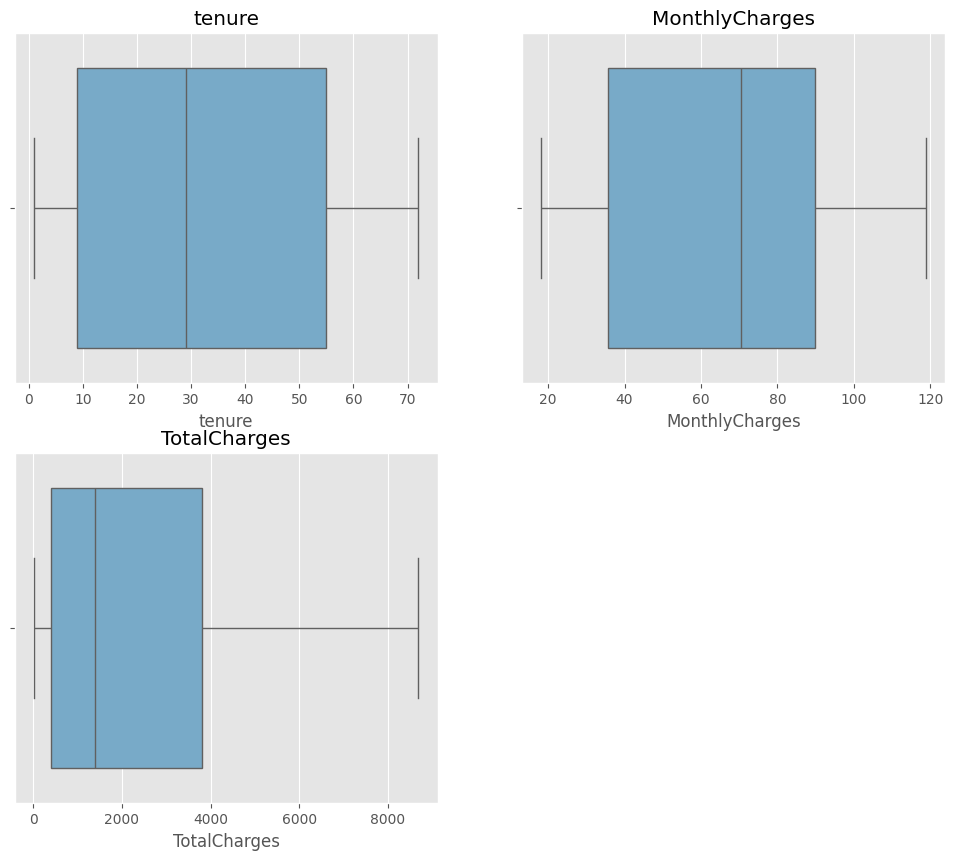

In [35]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

##### From boxplots, we can take a conclusion that each numerical variable doesn’t have an outlier.

## Feature Engineering
Raw data can be transformed into features that are suitable for machine learning models that process called feature engineering. The aim of feature engineering is to make a machine learning model for better learning and get more accuracy. In this article, we will label encoding for categorical variables that have two values, one hot encoding for categorical variables that have more than two values, and feature calling for numerical variables.

## Label Encoding
Label encoding aims to convert categorical variables to numerical format. In this article, we will change categorical variables that have two values such as (Partner, Dependents, PhoneService, Churn, PaperlessBilling, and gender). Values of them just have Yes or No and we will change to 1 and 0 except gender is Female to 1 and Male to 0.

In [36]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

## One Hot Encoding
Same with label encoding, one hot encoding also changes categorical variables to numerical variables. But, one hot encoding takes more than two values. One hot encoding creates a new binary integer (1 or 0) column for each level of the categorical variable. Categorical variables that have more than two values are (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod).

In [37]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

## Feature Scaling
In this article, we use MinMaxScaler for feature scaling. MinMaxScaler can make numerical variables scaled from the range 0 to 1. Feature scaling is important to interpret machine learning models to have features on the same scale. We will be scaling numerical variables such as MonthlyCharges, TotalCharges, and tenure.

In [38]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

## Correlation Analysis

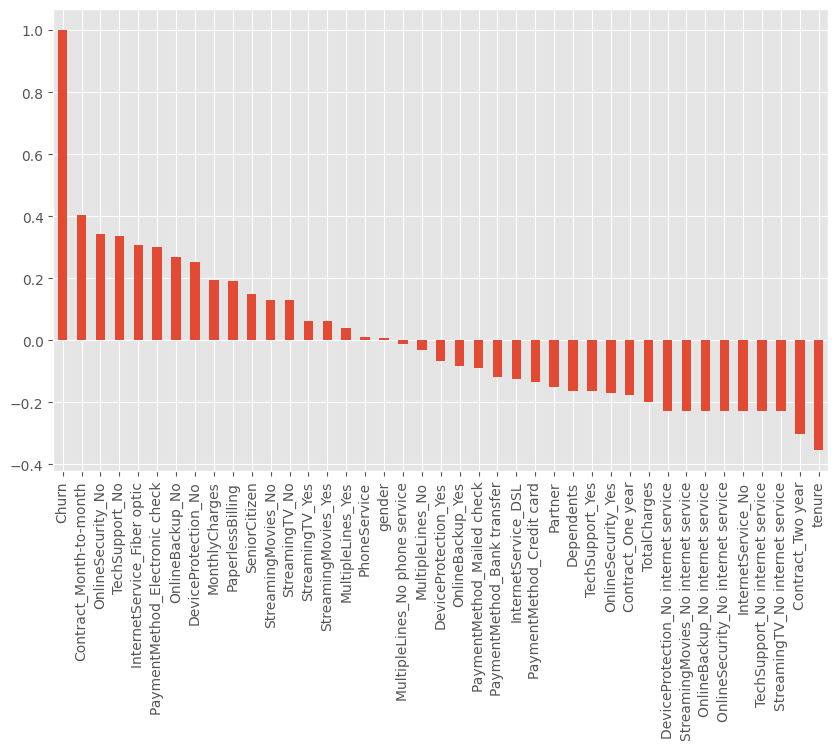

In [39]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

Correlation is a statistical method for testing the relationship between numerical or categorical variables. The following plot above is to know the correlation between some variables to target variable churn. The highest correlation is the Contract_Month-to-month variable so that variable is so related to churn rate. Tenure is had a negative correlation with churn so higher values from tenure make a lower churn.

## Train Test Split
Train test split is a process to validate the data set and simulate how the model performs with new data. In this article, we create 80% of train data and 20% of testing data. The “Churn” column we rename (the “y”) and the features column we rename (the “X”).

In [40]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 40), (1407, 40), (5625,), (1407,))

# Model Selection and Evaluation Model
### Model Selection
We use two models for churn classification, model that we use is:

1. K-Nearest Neighbors — quick, easy, and instance-based
2. Logistic Regression — This linear model

## Metric Evaluation
For evaluating the model we use some metrics evaluation such as:

1. Feature Weights — List the top weight of the features to make a prediction. Feature weights are used for the logistic regression model
2. Confusion Matrix — Show the true and false then compare to prediction and actual values.
3. Accuracy Score — Show the accuracy model from training and testing to measure that a model is suitable for prediction.
4. ROC Curve — Show the curve of True Positive Rate (TPR) against False Positive Rate (FPR) for different thresholds and the ROC curve is used for the diagnostic machine learning model.
5. AUC (for ROC) — Area Under Curve (AUC) is used to calculate the area of the ROC Curve and increasing area is better for the model.
6. Precision-Recall-Curve — Show the curve to compare the False Positive Rate (FPR) and False Negative Rate (FNR) for different thresholds and this metric is used to demonstrate the diagnostic model capability. This metric is suitable for imbalanced target data sets due to the focus on precision and recall and not dependent on the number of true negatives.
7. F1 Score — This metric is usually better for accuracy, especially if it has an imbalanced data set target distribution.
8. AUC (for PRC) — Measure the overall area under the curve of PRC.

### Creates Function For Displaying Evaluation Metrics

In [41]:
# For logistic Regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

In [42]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")

In [43]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

In [44]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

# K-Nearest Neighbor

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

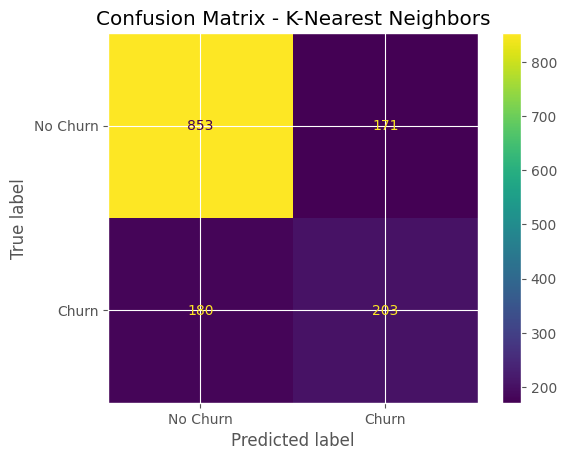

Accuracy Score Test = 0.7505330490405118
Accuracy Score Train = 0.8359111111111112




In [46]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

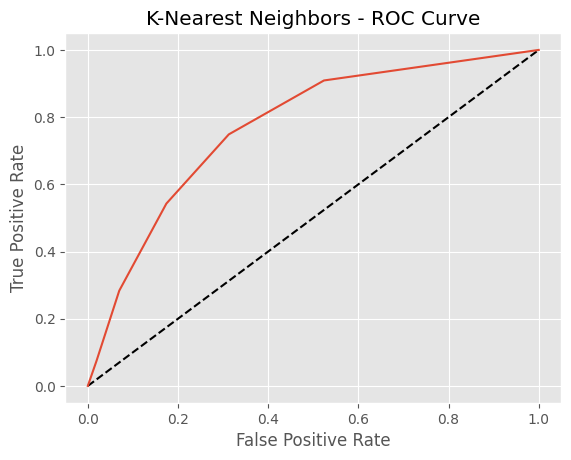

AUC Score (ROC):0.7718769898173121


In [47]:
roc_curve_auc_score(X_test,y_test,y_pred_knn_proba, "K-Nearest Neighbors")

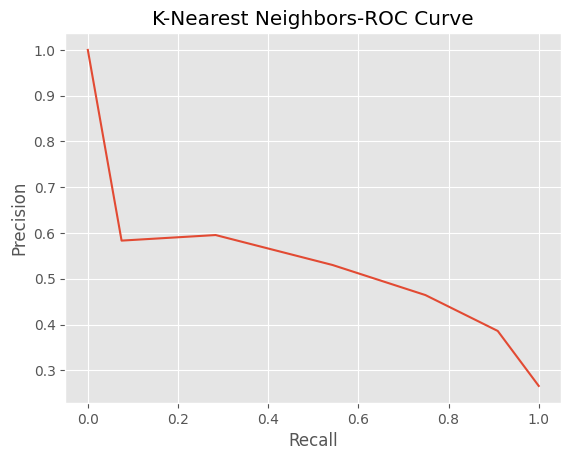

f1 Score : 0.5363276089828269 
 AUC Score (PR) : 0.5283439083015596


In [48]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_proba,"K-Nearest Neighbors")

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

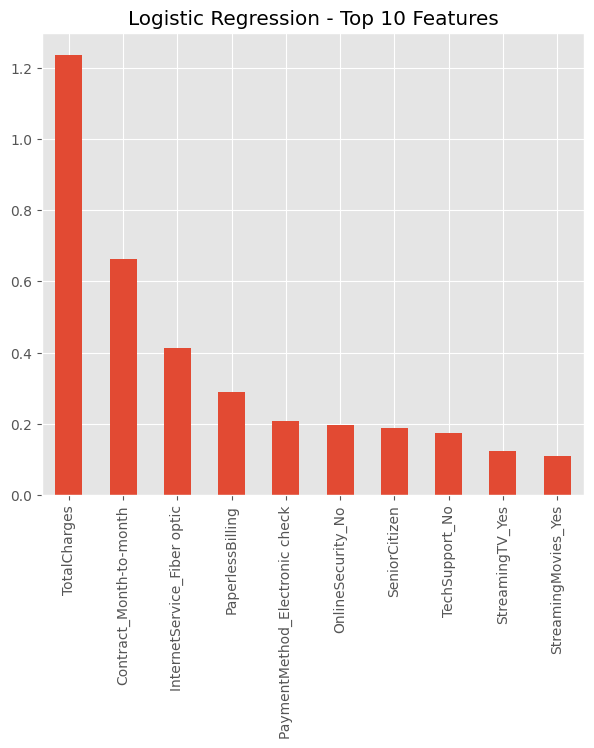

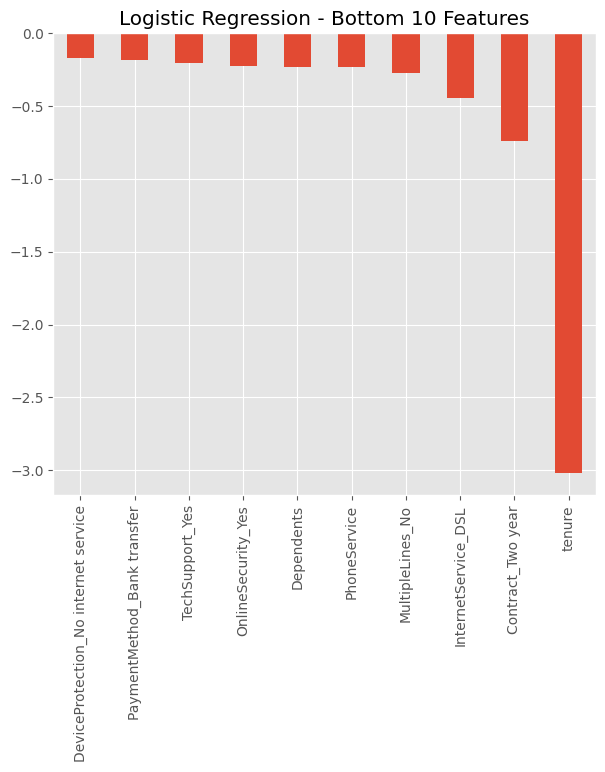

In [50]:
feature_weights(X_train,logreg,"Logistic Regression")

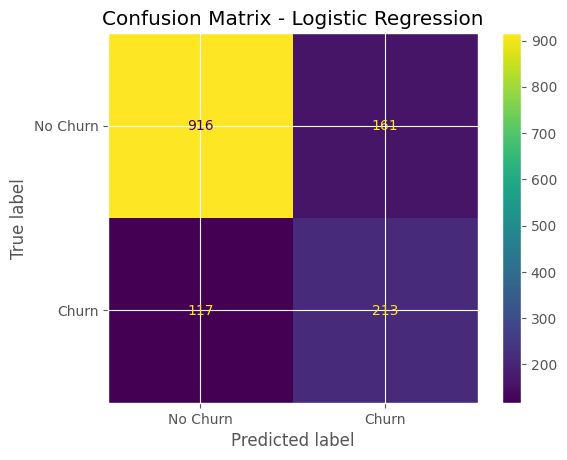

Accuracy Score Test = 0.8024164889836531
Accuracy Score Train = 0.8044444444444444




In [51]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

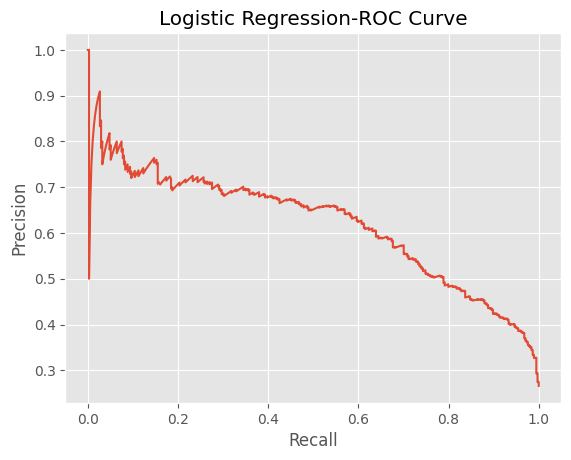

f1 Score : 0.5363276089828269 
 AUC Score (PR) : 0.6189079201227031


In [53]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_logreg_proba,"Logistic Regression")

# Conclusion

In this project, using the Telco Customer Churn dataset i have demonstrated an end-to-end machine learning project from beginning to end. Data cleaning and visualization were our first steps. Then, to give better data to train with the machine learning model we have to change categorical data to numerical data and we scale the numerical data (feature engineering). After that, we tried to build two machine-learning models and we evaluated that. Logistic regression has a high accuracy compared with KNN. The ability to recognize potential customer scenarios where churn can be prevented requires a high level of accuracy since the benefits of the customer’s eventual returns must balance the expenses of associated retention initiatives.